# Проверка применимости закона Арпса

In [3]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
production_by_period = pd.read_csv('production_by_period.csv', index_col=0)
production_by_period

,period,day,gas,oil,cum_gas,cum_oil
OSPREY,OSPREY_64.0_1101.0,64.0,0.027333,76.92,9.422333,2.833308e+04
OSPREY,OSPREY_64.0_1101.0,65.0,0.027333,76.92,9.449667,2.841000e+04
OSPREY,OSPREY_64.0_1101.0,66.0,0.027333,76.92,9.477000,2.848692e+04
OSPREY,OSPREY_64.0_1101.0,67.0,0.176000,493.65,9.653000,2.898057e+04
OSPREY,OSPREY_64.0_1101.0,68.0,0.117000,425.98,9.770000,2.940655e+04
...,...,...,...,...,...,...
GOOSE,GOOSE_0.0_2846.0,2842.0,0.000000,0.00,363416.692705,1.915000e+06
GOOSE,GOOSE_0.0_2846.0,2843.0,0.000000,0.00,363416.692705,1.915000e+06
GOOSE,GOOSE_0.0_2846.0,2844.0,0.000000,0.00,363416.692705,1.915000e+06
GOOSE,GOOSE_0.0_2846.0,2845.0,0.000000,0.00,363416.692705,1.915000e+06


# Разделяю добычу нефти и газа

Газ был во всех скважинах

In [5]:
production_gas = production_by_period[['period', 'day', 'gas', 'cum_gas']].copy()
production_gas.columns = ['period', 'day', 'flowrate', 'cumulative']
production_gas

,period,day,flowrate,cumulative
OSPREY,OSPREY_64.0_1101.0,64.0,0.027333,9.422333
OSPREY,OSPREY_64.0_1101.0,65.0,0.027333,9.449667
OSPREY,OSPREY_64.0_1101.0,66.0,0.027333,9.477000
OSPREY,OSPREY_64.0_1101.0,67.0,0.176000,9.653000
OSPREY,OSPREY_64.0_1101.0,68.0,0.117000,9.770000
...,...,...,...,...
GOOSE,GOOSE_0.0_2846.0,2842.0,0.000000,363416.692705
GOOSE,GOOSE_0.0_2846.0,2843.0,0.000000,363416.692705
GOOSE,GOOSE_0.0_2846.0,2844.0,0.000000,363416.692705
GOOSE,GOOSE_0.0_2846.0,2845.0,0.000000,363416.692705


Делаю названия колонок одинаковыми в ДФ с данными по газу и по нефти для удобства.

Скважины, дававшие нефть

In [6]:
oil_producers = pd.read_csv('well_data_modified.csv', 
                            index_col=0)['oil_producer']
oil_producers_list = oil_producers[oil_producers].index.to_list()
oil_producers_list

['OSPREY',
 'FALCON',
 'HAWK',
 'EAGLE',
 'KITE',
 'SWIFT',
 'SPARROW',
 'LARK',
 'CARDINAL',
 'JAY',
 'CROW']

Исключаю Falcon. Ее нет в датафрейме, т.к. у нее были слишком короткие периоды эксплуатации без изменения конструкциии и не удалось набрать статистику.

In [7]:
oil_producers_list.remove('FALCON')

In [8]:
production_oil = production_by_period[['period', 'day', 'oil', 'cum_oil']].loc[oil_producers_list, :]
production_oil.columns = ['period', 'day', 'flowrate', 'cumulative']
production_oil

,period,day,flowrate,cumulative
OSPREY,OSPREY_64.0_1101.0,64.0,76.92,2.833308e+04
OSPREY,OSPREY_64.0_1101.0,65.0,76.92,2.841000e+04
OSPREY,OSPREY_64.0_1101.0,66.0,76.92,2.848692e+04
OSPREY,OSPREY_64.0_1101.0,67.0,493.65,2.898057e+04
OSPREY,OSPREY_64.0_1101.0,68.0,425.98,2.940655e+04
...,...,...,...,...
CROW,CROW_24.0_216.0,212.0,266.26,1.749783e+06
CROW,CROW_24.0_216.0,213.0,265.92,1.750049e+06
CROW,CROW_24.0_216.0,214.0,259.30,1.750309e+06
CROW,CROW_24.0_216.0,215.0,203.33,1.750512e+06


# Пропущенные данные

In [9]:
production_oil.loc[production_oil.flowrate.isna()]

,period,day,flowrate,cumulative
OSPREY,OSPREY_64.0_1101.0,943.0,NaN,NaN
OSPREY,OSPREY_64.0_1101.0,1084.0,NaN,NaN
OSPREY,OSPREY_1101.0_1302.0,1119.0,NaN,NaN
OSPREY,OSPREY_1101.0_1302.0,1251.0,NaN,NaN
SPARROW,SPARROW_887.0_1245.0,890.0,NaN,NaN
SPARROW,SPARROW_887.0_1245.0,960.0,NaN,NaN


Заполняю путем интерполяции

In [10]:
production_oil.interpolate(method='linear',
                           axis=0, 
                           inplace=True)

In [11]:
production_gas.interpolate(method='linear',
                           axis=0, 
                           inplace=True)

# Экспоненциальная зависимость

## Добыча нефти

In [12]:
def exponent_fit(period, production_data):
    period = period.iloc[0]
    df = production_data.copy().query('period == @period')
    result = stats.linregress(df.cumulative, df.flowrate)
    return [result.rvalue, result.slope, result.stderr, result.intercept, result. intercept_stderr, result.pvalue]

In [13]:
periods = production_oil.period.unique()

In [14]:
results_oil = pd.DataFrame({'period': periods})

In [15]:
results_oil = results_oil.join(results_oil.apply(exponent_fit,
                                                axis=1,
                                                result_type='expand',
                                                **{'production_data': production_oil}))
results_oil.columns=['period', 'R', 'slope', 'slope_stderr', 'intercept', 'intercept_stderr', 'p_value']
results_oil

,period,R,slope,slope_stderr,intercept,intercept_stderr,p_value
0,OSPREY_64.0_1101.0,-0.827837,-0.002463,0.000052,267.962396,4.230207,1.365389e-260
1,OSPREY_1101.0_1302.0,-0.136416,-0.001132,0.000581,472.172869,80.632385,5.288522e-02
2,OSPREY_1302.0_1602.0,-0.637486,-0.005341,0.000373,1293.927812,76.751842,9.904720e-36
3,OSPREY_1602.0_2355.0,-0.617113,-0.001470,0.000068,509.291589,18.793267,2.472728e-80
4,HAWK_125.0_233.0,0.789913,0.051644,0.003894,-20614.558230,1565.811130,2.988921e-24
5,EAGLE_0.0_205.0,-0.696965,-0.003275,0.000237,2327.699789,119.574702,5.382670e-31
6,EAGLE_205.0_1483.0,-0.832846,-0.001304,0.000024,1187.877619,18.066754,0.000000e+00
7,KITE_0.0_111.0,0.303649,0.003806,0.001144,-3109.050711,977.456137,1.196245e-03
8,KITE_111.0_1066.0,-0.739287,-0.001973,0.000058,1844.075563,52.486987,5.123331e-166
9,SWIFT_0.0_144.0,-0.253641,-0.001752,0.000561,2086.300744,535.989713,2.158669e-03


In [32]:
results_oil.query('period == "OSPREY_1101.0_1302.0"').slope.iloc[0]

-0.0011316568785814166

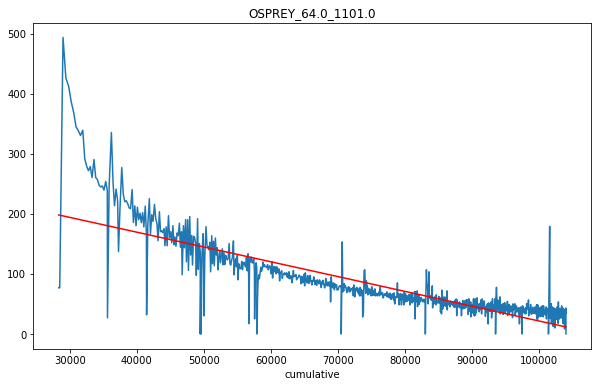

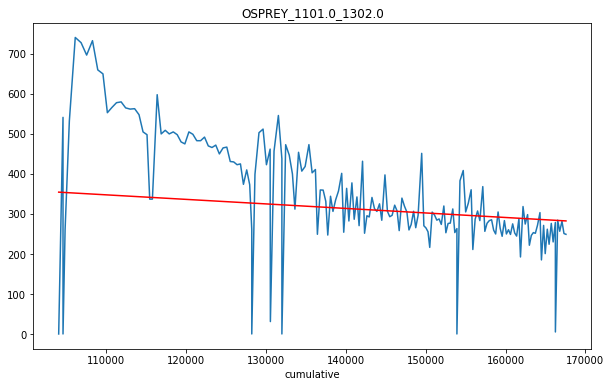

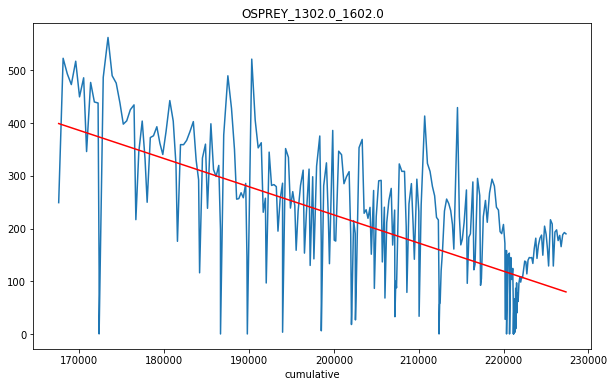

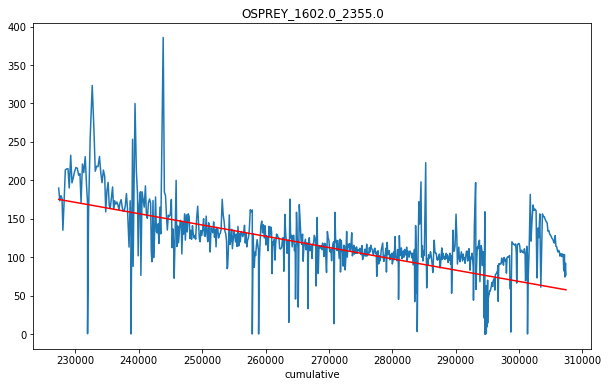

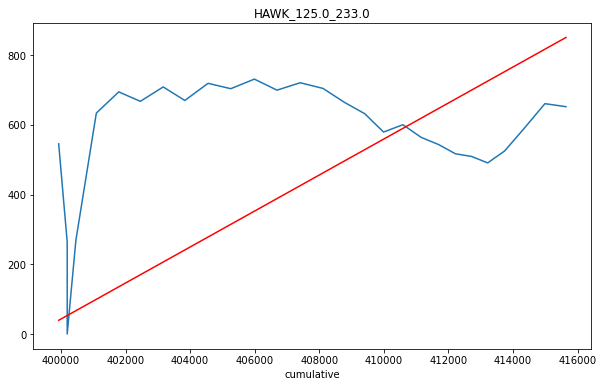

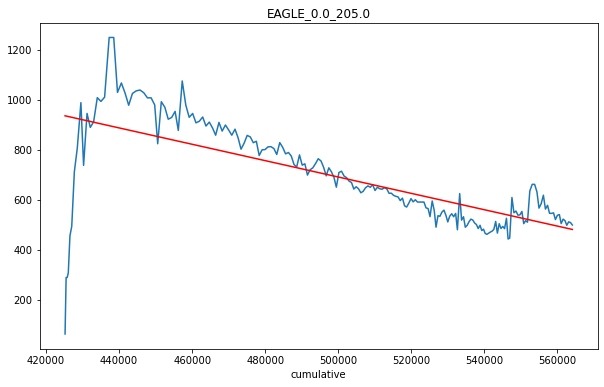

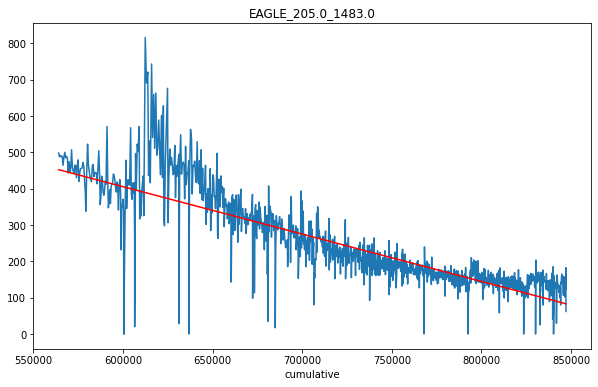

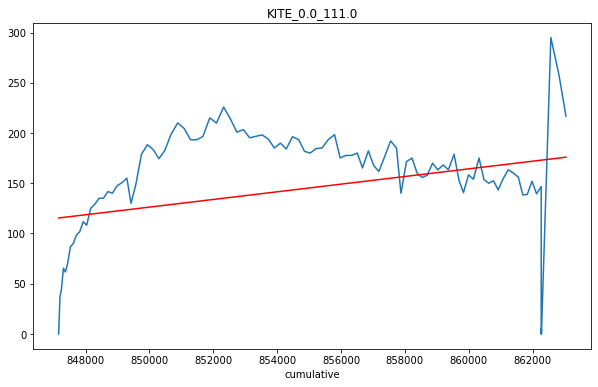

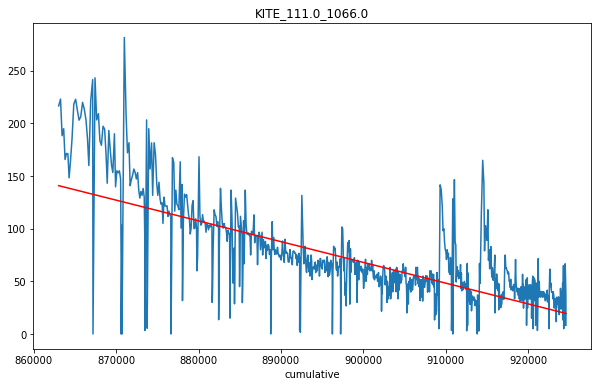

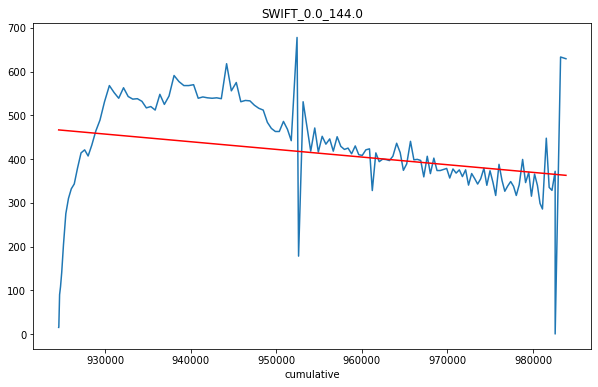

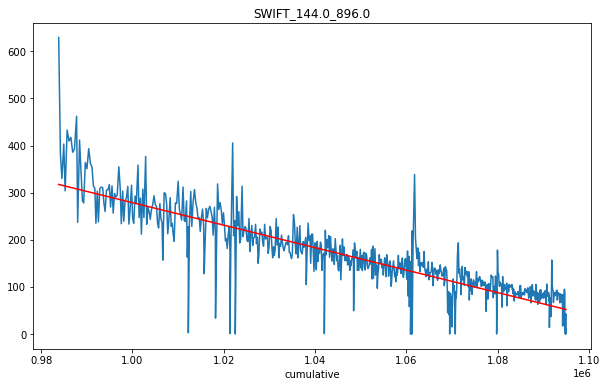

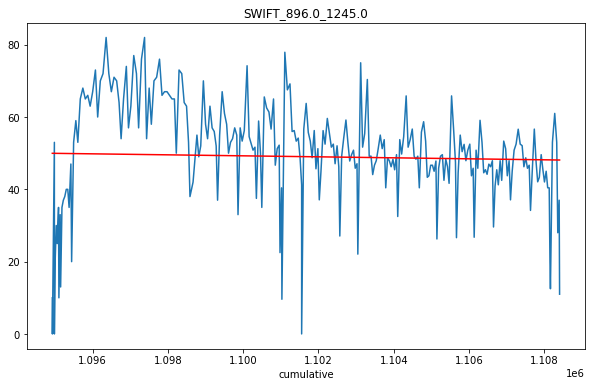

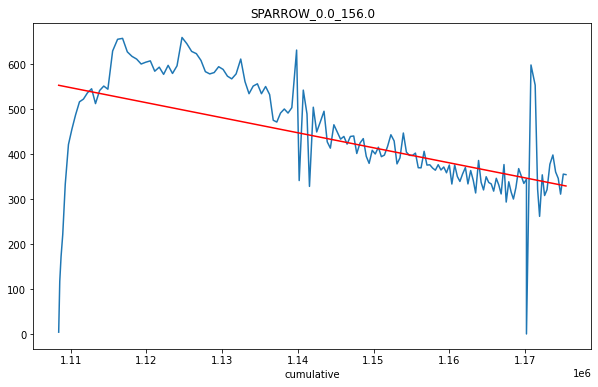

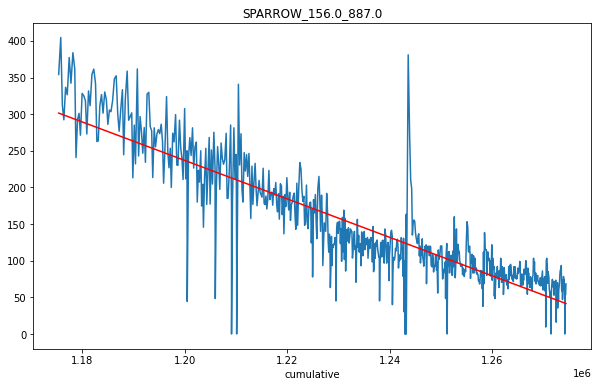

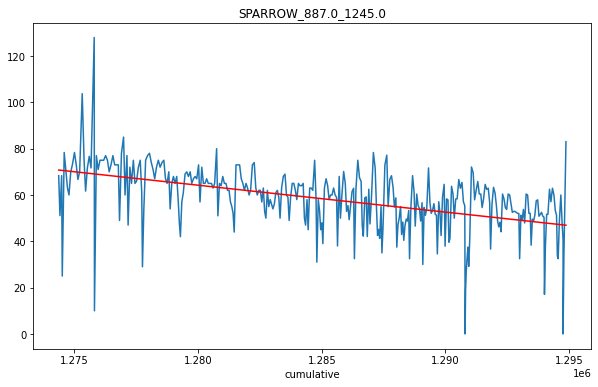

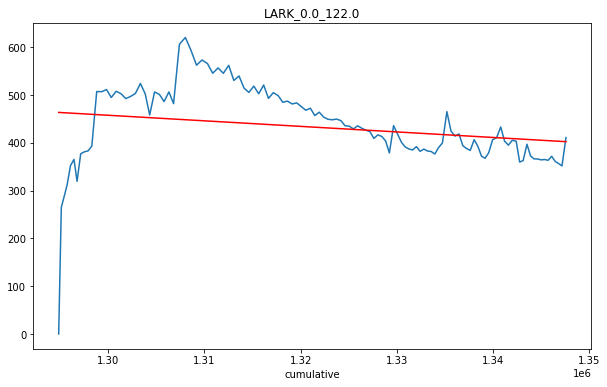

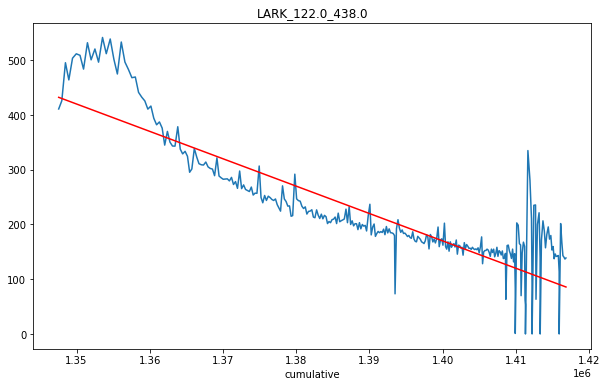

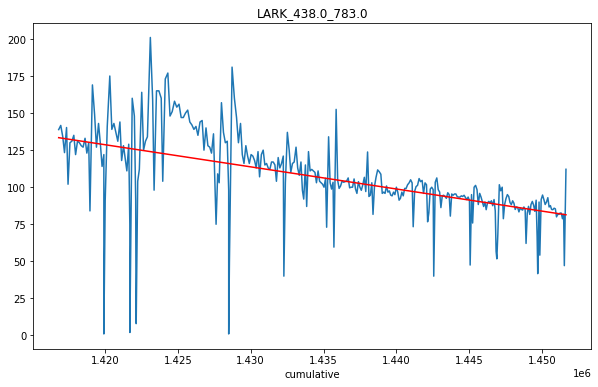

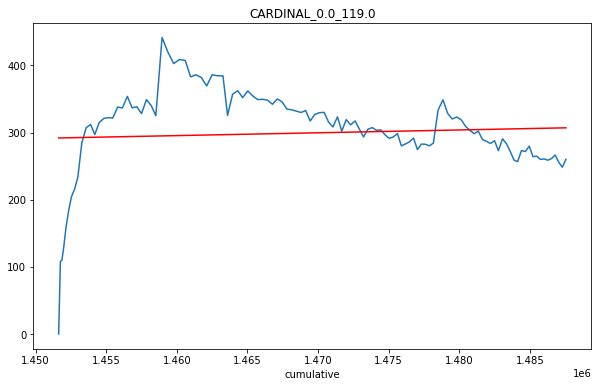

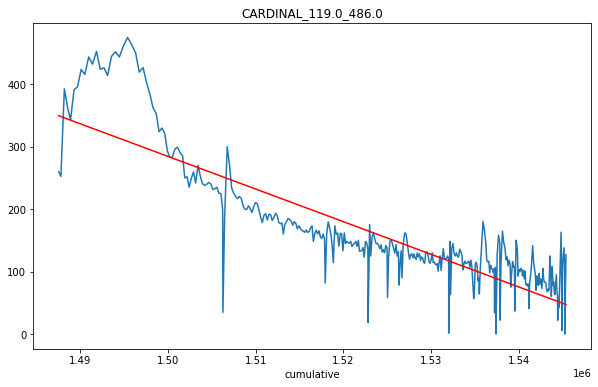

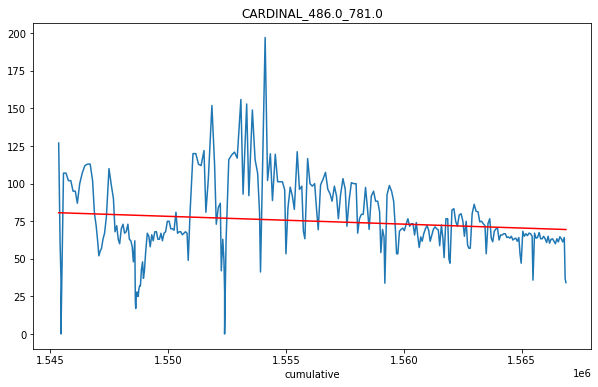

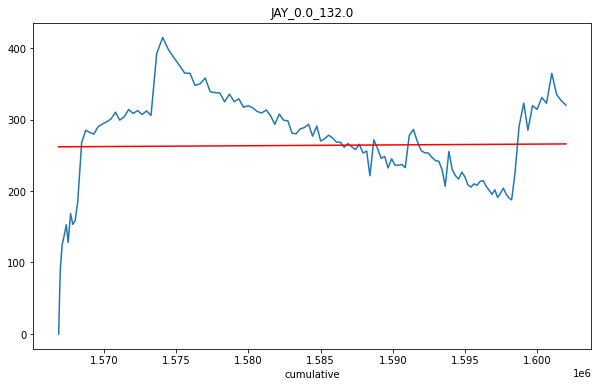

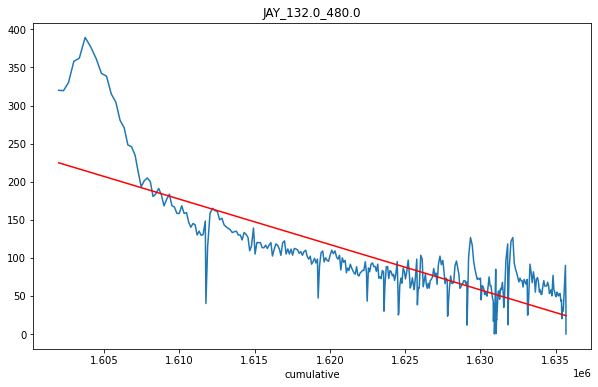

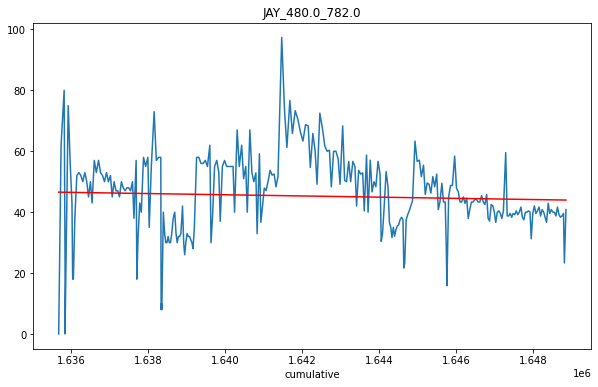

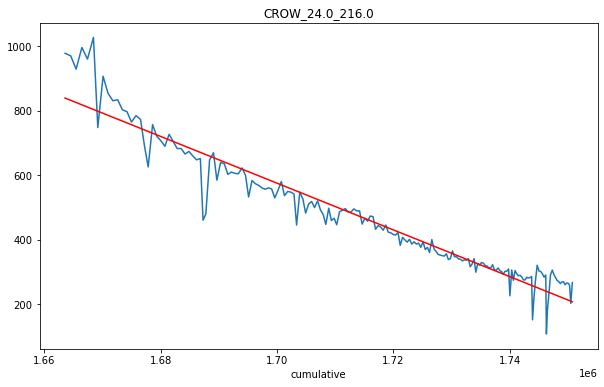

In [33]:
for period in periods:
    slope = results_oil.query('period == @period').slope.iloc[0]
    intercept = results_oil.query('period == @period').intercept.iloc[0]
    fig, ax = plt.subplots(figsize=(10,6))
    actual = production_oil.query('period == @period')
    actual.plot.line('cumulative',
                        'flowrate', 
                        legend=False,
                        ax=ax,
                       title=period)
    plt.plot(actual.cumulative, intercept + slope*actual.cumulative, 'r')
    plt.show();